In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
file_path=r"C:\Users\Aaryan\Documents\Test"
file_name="qa_accuracy_original_file_4.xlsx"
sheet_name="QA Tracker"

full_file_path=os.path.join(file_path,file_name)
quality_df=pd.read_excel(full_file_path,sheet_name=sheet_name)


In [3]:
os.path.exists(full_file_path)

True

In [4]:
import os
import pandas as pd

file_path = r"C:\Users\Aaryan\Documents\Test"
file_name = "qa_accuracy_original_file_4.xlsx"
sheet_name = "QA Tracker"

full_file_path = os.path.join(file_path, file_name)

# Check if file exists before reading
if os.path.exists(full_file_path):
    quality_df = pd.read_excel(full_file_path, sheet_name=sheet_name)
    print(quality_df) # Print DataFrame
else:
    print("File does not exist")


                      SPI Editor     Source  Unnamed: 2  \
0                    Abin Arouje   HGTVHD-E       45398   
1         Ramanjaneyulu Subbaiah   MAGNHD-E       45398   
2       Prashanth Kumarakrishnan     CNBCHD       45398   
3    Mangayarkarasi Muthupandian    TBSHD-E       45398   
4    Mangayarkarasi Muthupandian  truTVHD-E       45398   
..                           ...        ...         ...   
209           Lakshmi Nagalingam     KXVADT       45403   
210  Mangayarkarasi Muthupandian     WBNSDT       45403   
211                  Anish Kevin      WGNDT       45403   
212          Antos Karunian Aron      WRCDT       45403   
213               Sandeep Prasad     WTTGDT       45403   

     Dates Checked to mm/dd  #Days Checked  SPI QA editor  Date QA'd  \
0                     45407             10       Durgaram      45397   
1                     45407             10       Durgaram      45397   
2                     45407             10       Durgaram      45397   
3  

In [5]:
quality_df.columns=quality_df.columns.str.lower()
quality_df.columns=quality_df.columns.str.replace(" ","_")

In [6]:
quality_df['spi_editor']=quality_df['spi_editor'].str.strip()
quality_df['spi_editor']=quality_df['spi_editor'].replace("Vidhya","Vidhya Tekur")

In [7]:
quality_df['%_shows_correct']=pd.to_numeric(quality_df['%_shows_correct'],errors='coerce')*100
quality_df['%_rovi_episodes_correct']=pd.to_numeric(quality_df['%_rovi_episodes_correct'],errors='coerce')*100
quality_df['%_correct']=pd.to_numeric(quality_df['%_correct'],errors='coerce')*100

In [8]:
quality_df['new_%_shows_correct']=(quality_df['titles_correct']/quality_df['total_#_shows'])*100
quality_df['new_%_rovi_episodes_correct']=(quality_df['rovi_episodes_correct']/quality_df['total_#_episodes'])*100
quality_df['new_%_correct'] = np.where(
    
    quality_df['new_%_rovi_episodes_correct'].isnull(),
    quality_df['new_%_shows_correct'],
    (quality_df['new_%_shows_correct'] * 0.60 + quality_df['new_%_rovi_episodes_correct'] * 0.40)
)


In [19]:
#Group by and pivot
average_percentage_correct=quality_df.groupby('spi_editor')['new_%_correct'].mean().round(2)
average_percentage_correct_sorted=average_percentage_correct.sort_values()

pivot_df=average_percentage_correct_sorted.reset_index()
pivot_df.rename(columns={'new_%_correct':'quality_score'},inplace=True)

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_40740\392464310.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(final_df['spi_editor'], rotation=45, ha='right')


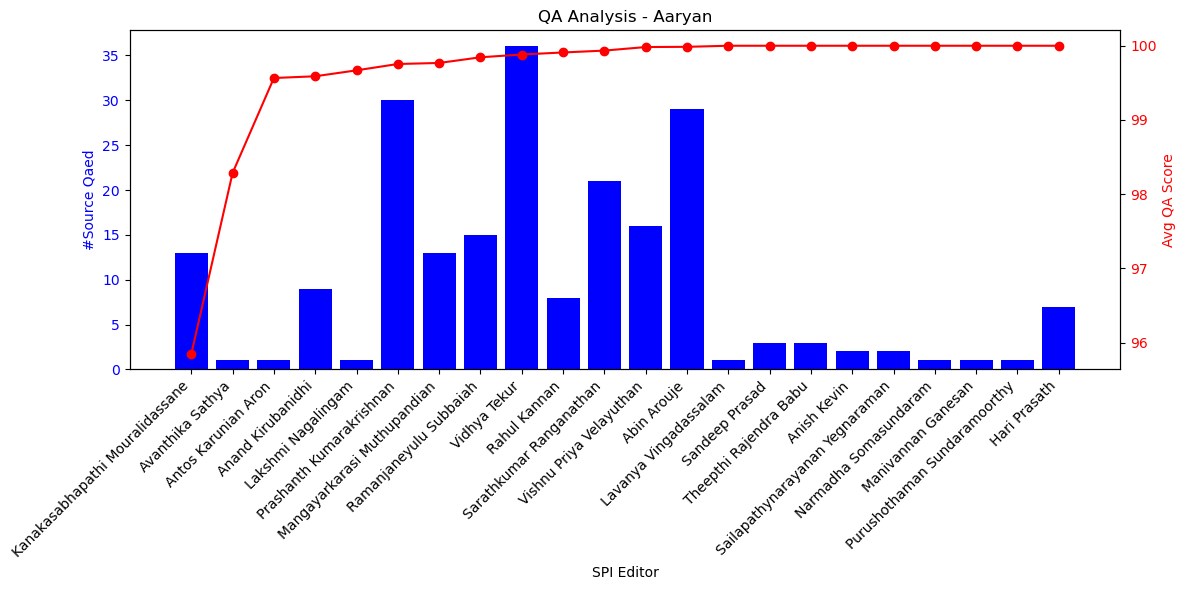

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r"C:\Users\Aaryan\Documents\Test\qa_accuracy_original_file_4.xlsx"
sheet_name = "QA Tracker"

quality_df = pd.read_excel(file_path, sheet_name=sheet_name)

# Clean column names
quality_df.columns = quality_df.columns.str.lower().str.replace(" ", "_")

# Clean SPI Editor names
quality_df['spi_editor'] = quality_df['spi_editor'].str.strip()
quality_df['spi_editor'] = quality_df['spi_editor'].replace("Vidhya", "Vidhya Tekur")

# Convert percentage columns to numeric
quality_df['%_shows_correct'] = pd.to_numeric(quality_df['%_shows_correct'], errors='coerce') * 100
quality_df['%_rovi_episodes_correct'] = pd.to_numeric(quality_df['%_rovi_episodes_correct'], errors='coerce') * 100
quality_df['%_correct'] = pd.to_numeric(quality_df['%_correct'], errors='coerce') * 100

# Calculate new % correct values
quality_df['new_%_shows_correct'] = (quality_df['titles_correct'] / quality_df['total_#_shows']) * 100
quality_df['new_%_rovi_episodes_correct'] = (quality_df['rovi_episodes_correct'] / quality_df['total_#_episodes']) * 100

# Compute final % correct with weights
quality_df['new_%_correct'] = np.where(
    quality_df['new_%_rovi_episodes_correct'].isnull(),
    quality_df['new_%_shows_correct'],
    (quality_df['new_%_shows_correct'] * 0.60 + quality_df['new_%_rovi_episodes_correct'] * 0.40)
)

# Compute Source Qaed (count) and Avg QA Score (mean)
source_count = quality_df['spi_editor'].value_counts().reset_index()
source_count.columns = ['spi_editor', '#Source Qaed']

avg_qa_score = quality_df.groupby('spi_editor')['new_%_correct'].mean().reset_index()
avg_qa_score.columns = ['spi_editor', 'Avg QA Score']

# Merge the two and sort by Avg QA Score in ascending order
final_df = pd.merge(source_count, avg_qa_score, on='spi_editor').sort_values(by='Avg QA Score', ascending=True)

# Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for #Source Qaed
ax1.bar(final_df['spi_editor'], final_df['#Source Qaed'], color='blue', label='#Source Qaed')
ax1.set_xlabel("SPI Editor")
ax1.set_ylabel("#Source Qaed", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(final_df['spi_editor'], rotation=45, ha='right')

# Line chart for Avg QA Score
ax2 = ax1.twinx()
ax2.plot(final_df['spi_editor'], final_df['Avg QA Score'], color='red', marker='o', label='Avg QA Score')
ax2.set_ylabel("Avg QA Score", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title("QA Analysis - Aaryan")
fig.tight_layout()
plt.show()


In [ ]:
quality_df

In [ ]:
import os
import pandas as pd

file_path = r"C:\Users\Aaryan\Documents\Test"
file_name = "qa_accuracy_original_file_4.xlsx"
sheet_name = "QA Tracker"

full_file_path = os.path.join(file_path, file_name)

# Check if file exists before reading
if os.path.exists(full_file_path):
    quality_df = pd.read_excel(full_file_path, sheet_name=sheet_name)
    print(quality_df) # Print DataFrame
else:
    print("File does not exist")

In [ ]:
quality_df.head()
quality_df.tail()
quality_df.describe()
quality_df.info()
quality_df.shape

In [ ]:
quality_df.columns

In [ ]:
quality_df.columns.tolist()

In [ ]:
sorted(quality_df.columns)

In [ ]:
quality_df.isnull().sum()

In [ ]:
quality_df.dtypes

In [ ]:
quality_df.info()

In [ ]:
quality_df.columns


In [ ]:
quality_df.columns=quality_df.columns.str.lower()
quality_df.columns=quality_df.columns.str.replace(" ","_")

In [ ]:
quality_df

In [ ]:
date_columns=["dates_checked_to_mm/dd","unnamed:_2","date_qa'd"]

for columns in date_columns:
    quality_df[columns] = pd.to_datetime(quality_df[columns]-25589,unit='D')
    quality_df[columns] = quality_df[columns].dt.strftime("%d-%m-%y")

In [ ]:
quality_df

In [ ]:
quality_df['spi_editor']

In [ ]:
sorted(quality_df['spi_editor'])

In [ ]:
sorted(quality_df['spi_editor'].unique())

In [ ]:
sorted(quality_df['spi_editor'].unique().tolist())

In [ ]:
quality_df['spi_editor']=quality_df['spi_editor'].str.strip()
quality_df['spi_editor']=quality_df['spi_editor'].replace("Vidhya","Vidhya Tekur")
quality_df

In [ ]:
quality_df

In [ ]:
quality_df

In [ ]:
quality_df['%_shows_correct']=pd.to_numeric(quality_df['%_shows_correct'],errors='coerce')*100

In [ ]:
quality_df['%_shows_correct']

In [ ]:
quality_df['%_rovi_episodes_correct']=pd.to_numeric(quality_df['%_rovi_episodes_correct'],errors='coerce')*100
quality_df['%_correct']=pd.to_numeric(quality_df['%_correct'],errors='coerce')*100

In [ ]:
quality_df['%_rovi_episodes_correct']

In [ ]:
quality_df['%_correct']


In [ ]:
quality_df['new_%_shows_correct']=(quality_df['titles_correct']/quality_df['total_#_shows'])*100
quality_df['new_%_rovi_episodes_correct']=(quality_df['rovi_episodes_correct']/quality_df['total_#_episodes'])*100
quality_df['new_%_correct'] = np.where(
    
    quality_df['new_%_rovi_episodes_correct'].isnull(),
    quality_df['new_%_shows_correct'],
    (quality_df['new_%_shows_correct'] * 0.60 + quality_df['new_%_rovi_episodes_correct'] * 0.40)
)


In [ ]:
quality_df['new_%_correct'] 

In [ ]:
quality_df['new_%_rovi_episodes_correct']

In [ ]:
#error
quality_df['check']=quality_df['new_%_correct'].round(2)==quality_df['%_correct'].round(2)
error_df= quality_df[quality_df['check']==False]
filtered_df= quality_df[quality_df['check']==True]

In [ ]:
error_df

In [ ]:
#Group by and pivot
average_percentage_correct=filtered_df.groupby('spi_editor')['new_%_correct'].mean().round(2)
average_percentage_correct_sorted=average_percentage_correct.sort_values()

pivot_df=average_percentage_correct_sorted.reset_index()
pivot_df.rename(columns={'new_%_correct':'quality_score'},inplace=True)

In [ ]:
quality_df.columns